# Import dependencies

In [15]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import math
from scipy.optimize import curve_fit


%matplotlib inline

# Functions

In [16]:
def fit_data(totale_casi, data, func):
    xdata = np.arange(len(totale_casi))
    popt, pcov = curve_fit(func, xdata, totale_casi)
    
    print("Parameters: {0}".format(popt))
    
    plt.rcParams.update({"legend.fontsize": "x-large",
                     "figure.figsize": (20, 15),
                     'xtick.labelsize': 10})
    ax = plt.gca()
    formatter = mdates.DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.DayLocator()
    ax.xaxis.set_major_locator(locator)

    plt.plot(data, totale_casi, label="Totale casi")
    plt.plot(data, func(xdata, *popt), "--", label="Curve fit")

    plt.legend(loc="upper left")
    plt.show()
    
    return xdata, popt, pcov

# Load data

In [17]:
dati_andamento_nazionale_fpath = "../../dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(dati_andamento_nazionale_fpath, sep=",")

In [18]:
df.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
31,2020-03-26T17:00:00,ITA,24753,3612,28365,33648,62013,4492,10361,8165,80539,361060,pd-IT-0007,pd-EN-0007
32,2020-03-27T17:00:00,ITA,26029,3732,29761,36653,66414,4401,10950,9134,86498,394079,NaN,NaN
33,2020-03-28T17:00:00,ITA,26676,3856,30532,39533,70065,3651,12384,10023,92472,429526,NaN,NaN
34,2020-03-29T17:00:00,ITA,27386,3906,31292,42588,73880,3815,13030,10779,97689,454030,pd-IT-0009,pd-EN-0009
35,2020-03-30T17:00:00,ITA,27795,3981,31776,43752,75528,1648,14620,11591,101739,477359,NaN,NaN


## Coverti data: string to datetime object

In [19]:
df.loc[:, "data"] = df.loc[:, "data"].apply(lambda x: datetime
                                            .strptime(x, "%Y-%m-%dT%H:%M:%S")
                                            .replace(hour=0))

In [20]:
df.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
31,2020-03-26,ITA,24753,3612,28365,33648,62013,4492,10361,8165,80539,361060,pd-IT-0007,pd-EN-0007
32,2020-03-27,ITA,26029,3732,29761,36653,66414,4401,10950,9134,86498,394079,NaN,NaN
33,2020-03-28,ITA,26676,3856,30532,39533,70065,3651,12384,10023,92472,429526,NaN,NaN
34,2020-03-29,ITA,27386,3906,31292,42588,73880,3815,13030,10779,97689,454030,pd-IT-0009,pd-EN-0009
35,2020-03-30,ITA,27795,3981,31776,43752,75528,1648,14620,11591,101739,477359,NaN,NaN


## Seleziona data - ENG: Select Date 

In [21]:
oggi = datetime.strptime("2020-03-30", "%Y-%m-%d")
print(oggi)

2020-03-30 00:00:00


Dal momento che ci sono state variazioni dall'inizio dell'epidemia, selezioniamo una finestra temporale di 21 giorni.  
**oggi - 21 giorni**  

ENG: Since there have been several fluctuations since the beginning of the epidemic, we limit the analysis to a 21 days window  
**today - 21 days**

In [22]:
data_iniziale = oggi - timedelta(days=21)

In [23]:
df.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
31,2020-03-26,ITA,24753,3612,28365,33648,62013,4492,10361,8165,80539,361060,pd-IT-0007,pd-EN-0007
32,2020-03-27,ITA,26029,3732,29761,36653,66414,4401,10950,9134,86498,394079,NaN,NaN
33,2020-03-28,ITA,26676,3856,30532,39533,70065,3651,12384,10023,92472,429526,NaN,NaN
34,2020-03-29,ITA,27386,3906,31292,42588,73880,3815,13030,10779,97689,454030,pd-IT-0009,pd-EN-0009
35,2020-03-30,ITA,27795,3981,31776,43752,75528,1648,14620,11591,101739,477359,NaN,NaN


In [24]:
df = df[(df["data"] <= oggi) & (df["data"] >= data_iniziale)]

In [25]:
df.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
31,2020-03-26,ITA,24753,3612,28365,33648,62013,4492,10361,8165,80539,361060,pd-IT-0007,pd-EN-0007
32,2020-03-27,ITA,26029,3732,29761,36653,66414,4401,10950,9134,86498,394079,NaN,NaN
33,2020-03-28,ITA,26676,3856,30532,39533,70065,3651,12384,10023,92472,429526,NaN,NaN
34,2020-03-29,ITA,27386,3906,31292,42588,73880,3815,13030,10779,97689,454030,pd-IT-0009,pd-EN-0009
35,2020-03-30,ITA,27795,3981,31776,43752,75528,1648,14620,11591,101739,477359,NaN,NaN


# Totale casi e tamponi - ENG: Total cases and tests

In [26]:
df[ df["data"] == oggi ]

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
35,2020-03-30,ITA,27795,3981,31776,43752,75528,1648,14620,11591,101739,477359,NaN,NaN


In [27]:
df[ df["data"] == oggi ][["totale_casi", "tamponi"]]

,totale_casi,tamponi
35,101739,477359


## Rapport casi/tamponi odierno - ENG: Current cases/tests ratio 

In [28]:
totale_casi = df[ df["data"] == oggi ]["totale_casi"]
tamponi = df[ df["data"] == oggi ]["tamponi"]

print("Rapporto casi tamponi = %d%%" % int(totale_casi / tamponi * 100))

Rapporto casi tamponi = 21%


## Grafico andamento giornaliero

### Casi Totali e nuovi casi - ENG: Total cases and new cases

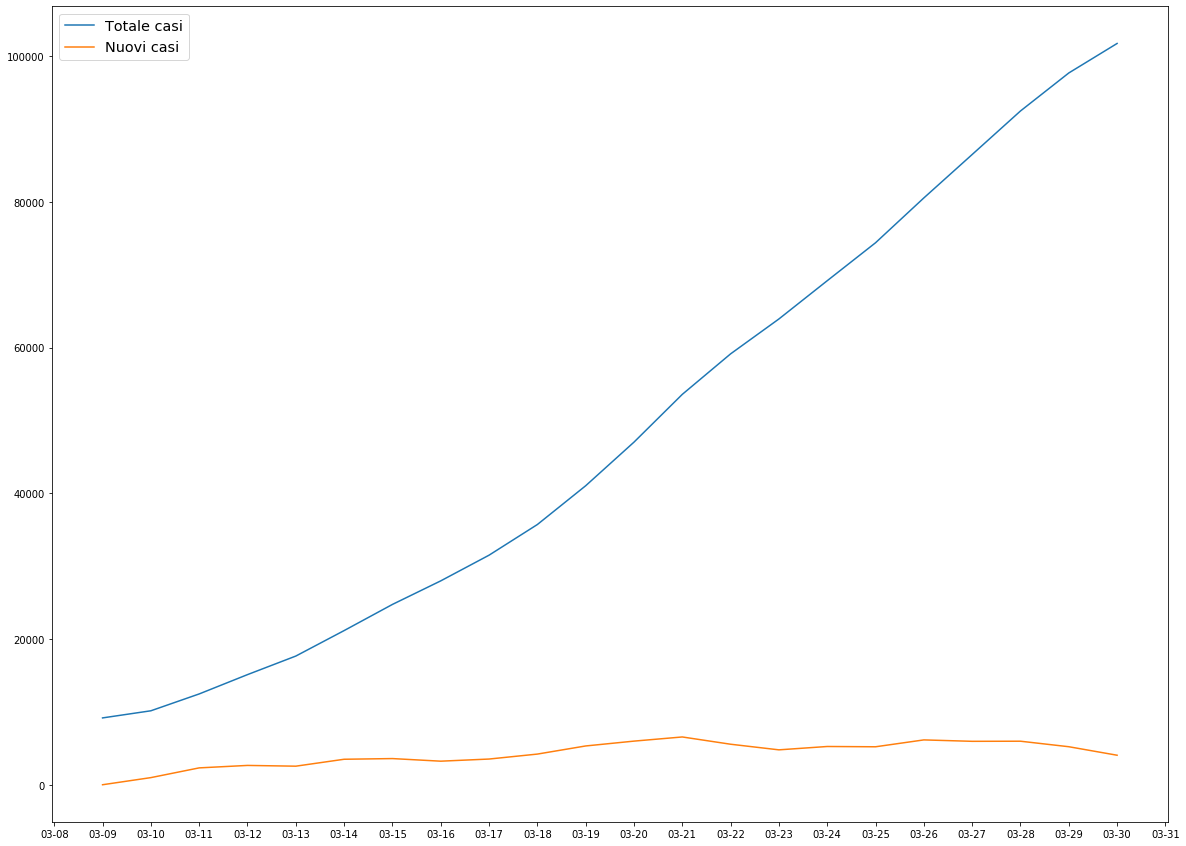

In [29]:
plt.rcParams.update({"legend.fontsize": "x-large",
                     "figure.figsize": (20, 15),
                     'xtick.labelsize': 10})
ax = plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)

data = df["data"].values
totale_casi = df["totale_casi"].values
nuovi_casi = totale_casi - np.roll(totale_casi, 1)
nuovi_casi[0] = 0

plt.plot(data, totale_casi, label="Totale casi")
plt.plot(data, nuovi_casi, label="Nuovi casi")

plt.legend(loc="upper left")
plt.show()

### Totale nuovi casi - ENG: Total New cases

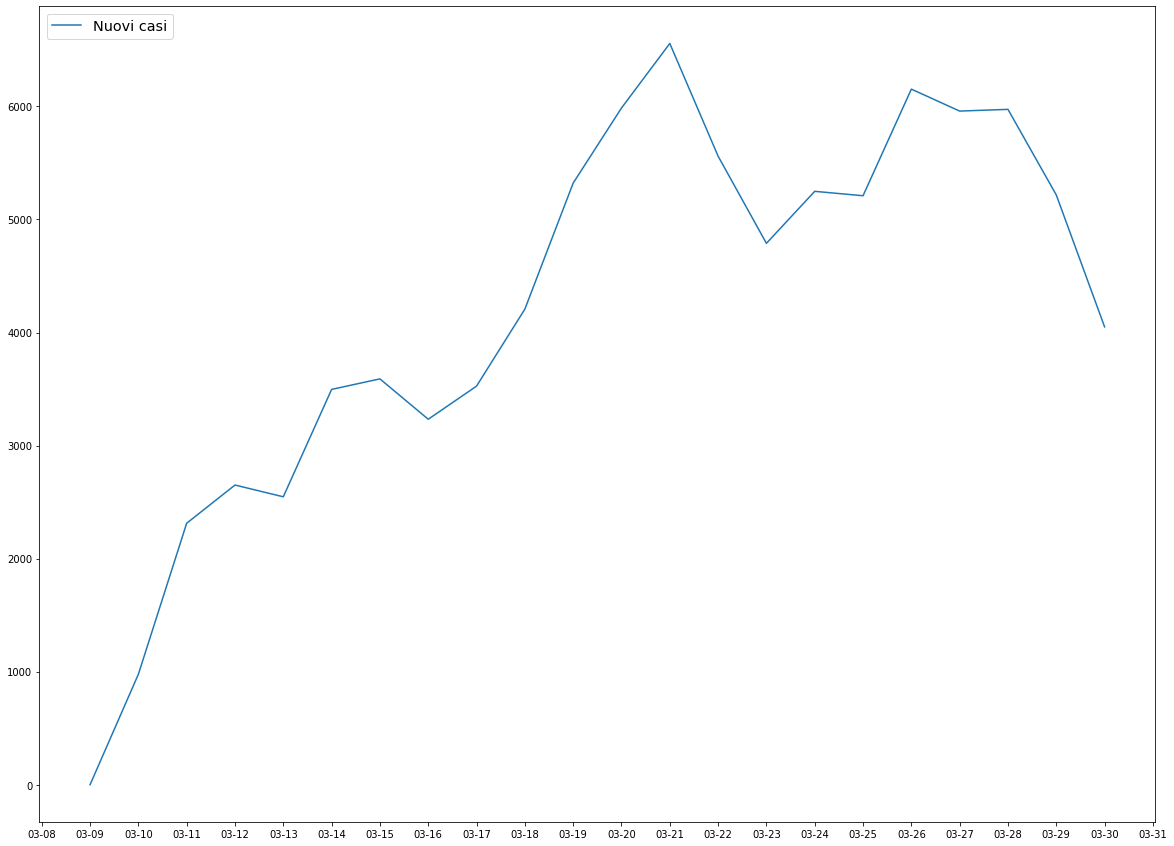

In [30]:
plt.rcParams.update({"legend.fontsize": "x-large",
                     "figure.figsize": (20, 15),
                     'xtick.labelsize': 10})
ax = plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)

data = df["data"].values
totale_casi = df["totale_casi"].values
nuovi_casi = totale_casi - np.roll(totale_casi, 1)
nuovi_casi[0] = 0

plt.plot(data, nuovi_casi, label="Nuovi casi")

plt.legend(loc="upper left")
plt.show()

### Rapporto casi tamponi - ENG: Cases Tests Ratio

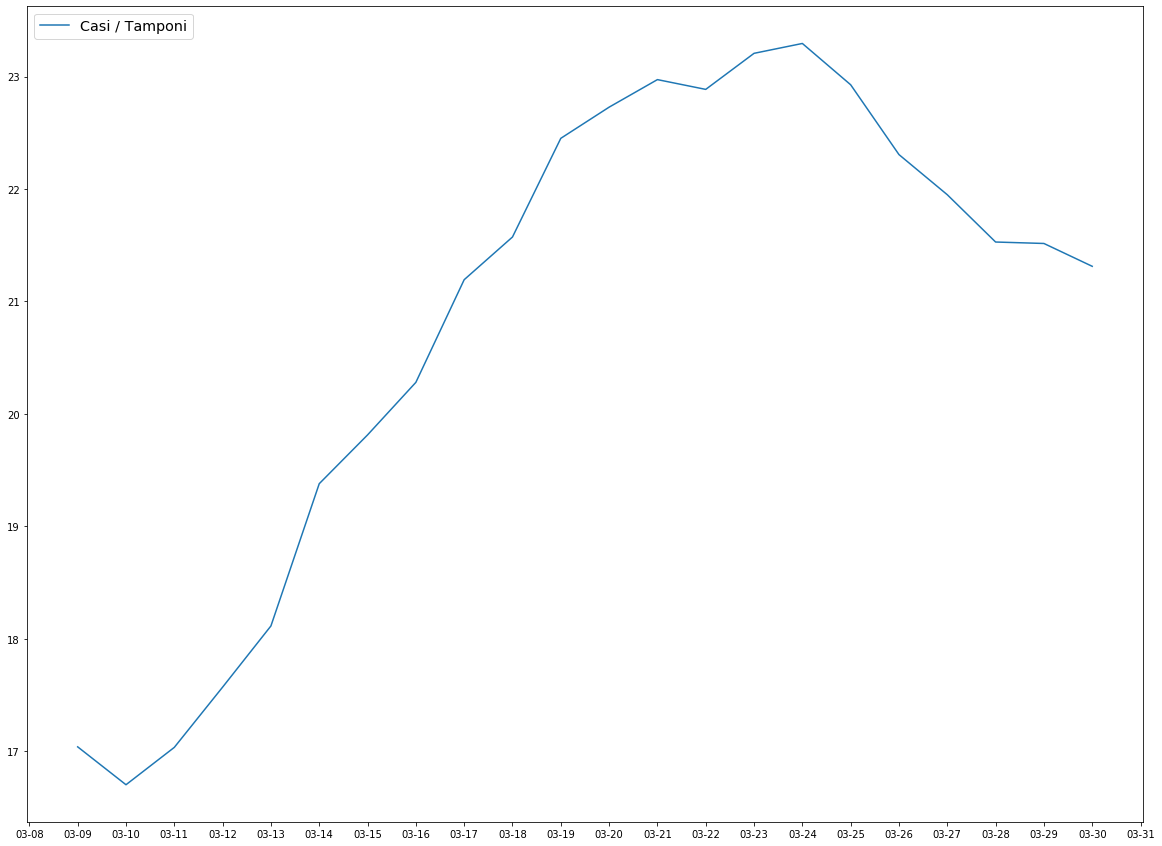

In [31]:
plt.rcParams.update({"legend.fontsize": "x-large",
                     "figure.figsize": (20, 15),
                     'xtick.labelsize': 10})
ax = plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)

data = df["data"].values
totale_casi = df["totale_casi"].values
tamponi = df["tamponi"].values
rapporto_casi_tamponi = totale_casi / tamponi * 100

plt.plot(data, rapporto_casi_tamponi, label="Casi / Tamponi")

plt.legend(loc="upper left")
plt.show()

### Rapporto nuovi casi e nuovi tamponi - ENG: New Cases New Tests Ratio

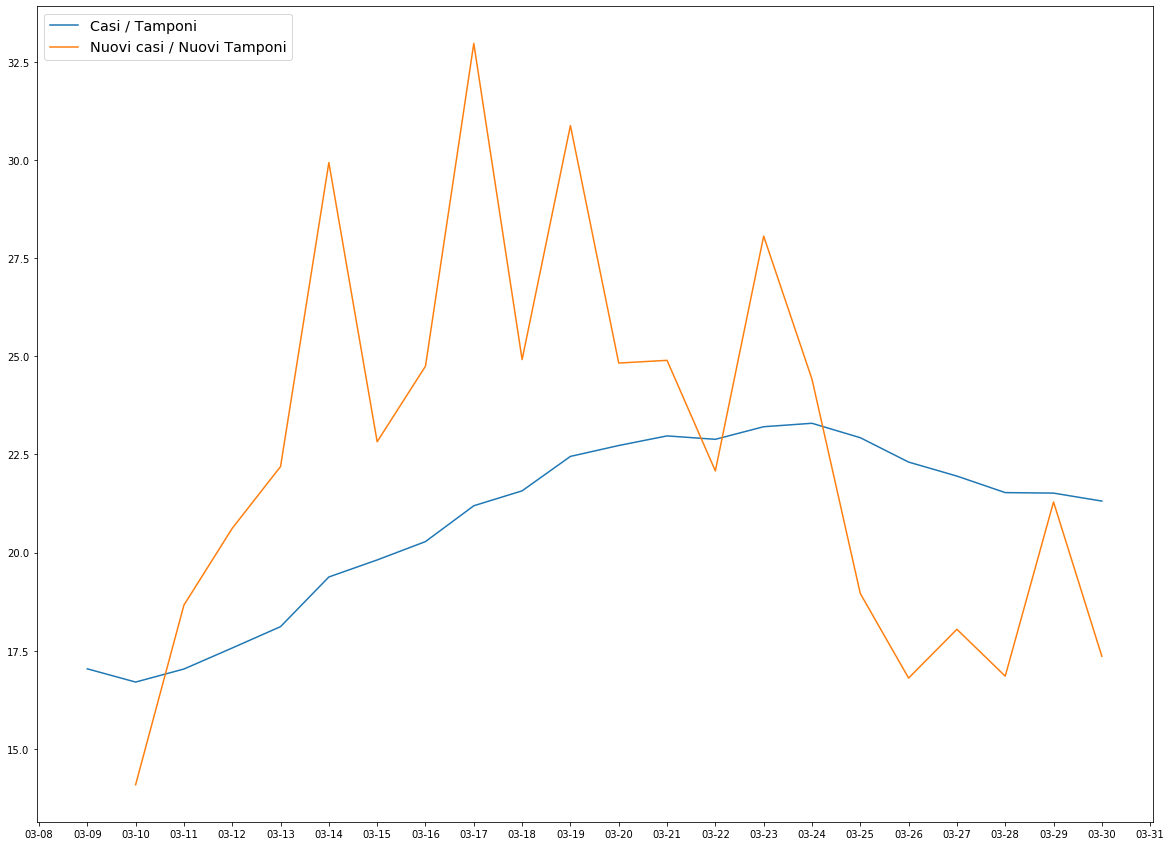

In [32]:
plt.rcParams.update({"legend.fontsize": "x-large",
                     "figure.figsize": (20, 15),
                     'xtick.labelsize': 10})
ax = plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)

data = df["data"].values
totale_casi = df["totale_casi"].values
tamponi = df["tamponi"].values

rapporto_casi_tamponi = totale_casi / tamponi * 100

nuovi_casi = totale_casi - np.roll(totale_casi, 1)
nuovi_casi = nuovi_casi[1:]
nuovi_tamponi = tamponi - np.roll(tamponi, 1)
nuovi_tamponi = nuovi_tamponi[1:]
rapporto_nuovi_casi_tamponi = nuovi_casi / nuovi_tamponi * 100

plt.plot(data, rapporto_casi_tamponi, label="Casi / Tamponi")
plt.plot(data[1:], rapporto_nuovi_casi_tamponi, label="Nuovi casi / Nuovi Tamponi")

plt.legend(loc="upper left")
plt.show()

# Exponential curve fit per Casi Totali - ENG: Exponetial curve fit for Total Cases

In [33]:
data_iniziale = oggi - timedelta(days=14)
df = df[(df["data"] <= oggi) & (df["data"] >= data_iniziale)]

totale_casi = df["totale_casi"].values
data = df["data"].values

In [34]:
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

Parameters: [ 7.97752485e+05  6.54665620e-03 -7.71335695e+05]


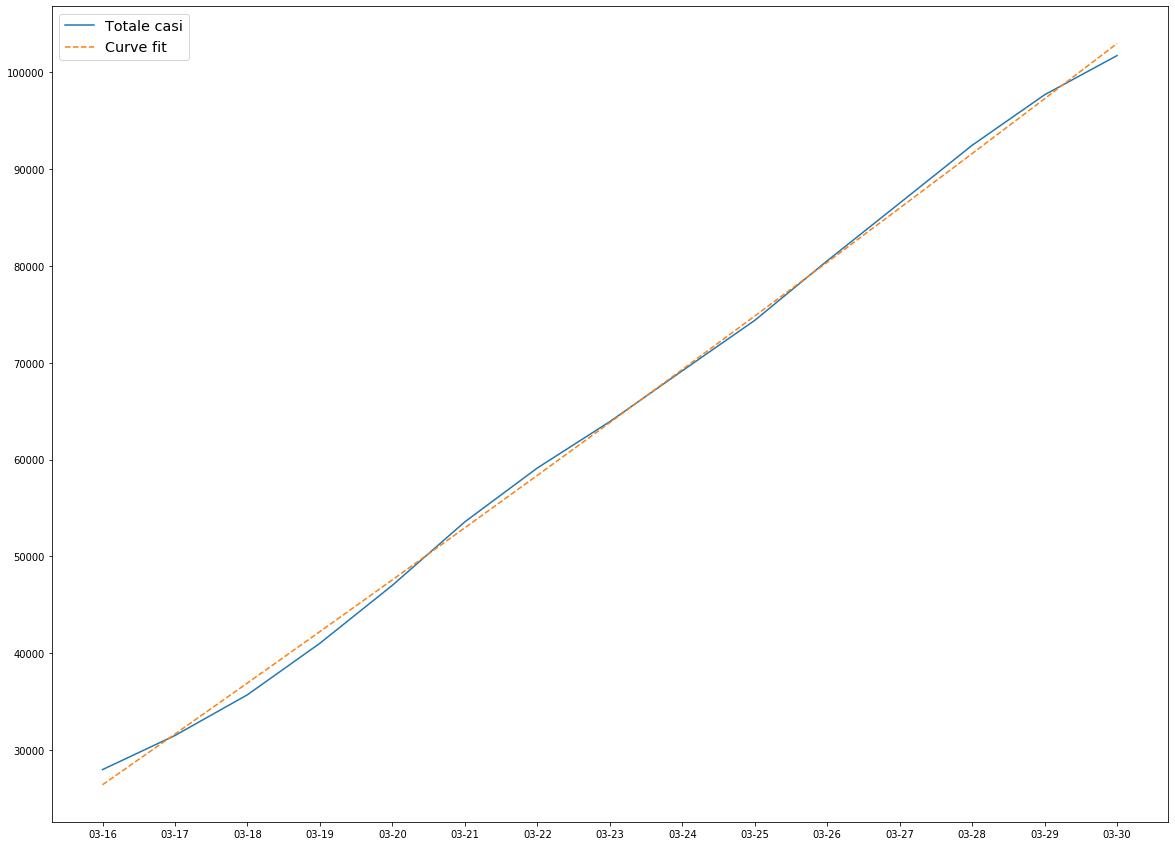

In [35]:
xdata, popt_exp, pcov_exp = fit_data(totale_casi, data, exponential_func)

## Errore parametri - ENG: Parameters Error

In [36]:
np.sqrt(np.diag(pcov_exp)).sum()

1302894.4279900296

## Predizione giorno seguente - ENG: Next Day Prediction

In [37]:
exponential_pred = exponential_func(np.array([xdata[-1]+1]), *popt_exp).astype(int)

In [38]:
print("Valore odierno: {0} | Giorno seguente: {1} | Incremento {2}".format(totale_casi[-1], exponential_pred[0],
                                                                           exponential_pred[0] - totale_casi[-1]))

Valore odierno: 101739 | Giorno seguente: 108731 | Incremento 6992


# Cubic curve fit per Casi Totali - ENG: Cubic curve fit for Total Cases

In [39]:
def cubic_func(x, a, b, c, d):
    return a*np.power(x, 3) + b*np.power(x, 2) + c*x + d

Parameters: [-8.09005782e+00  1.88282455e+02  4.29229920e+03  2.73194520e+04]


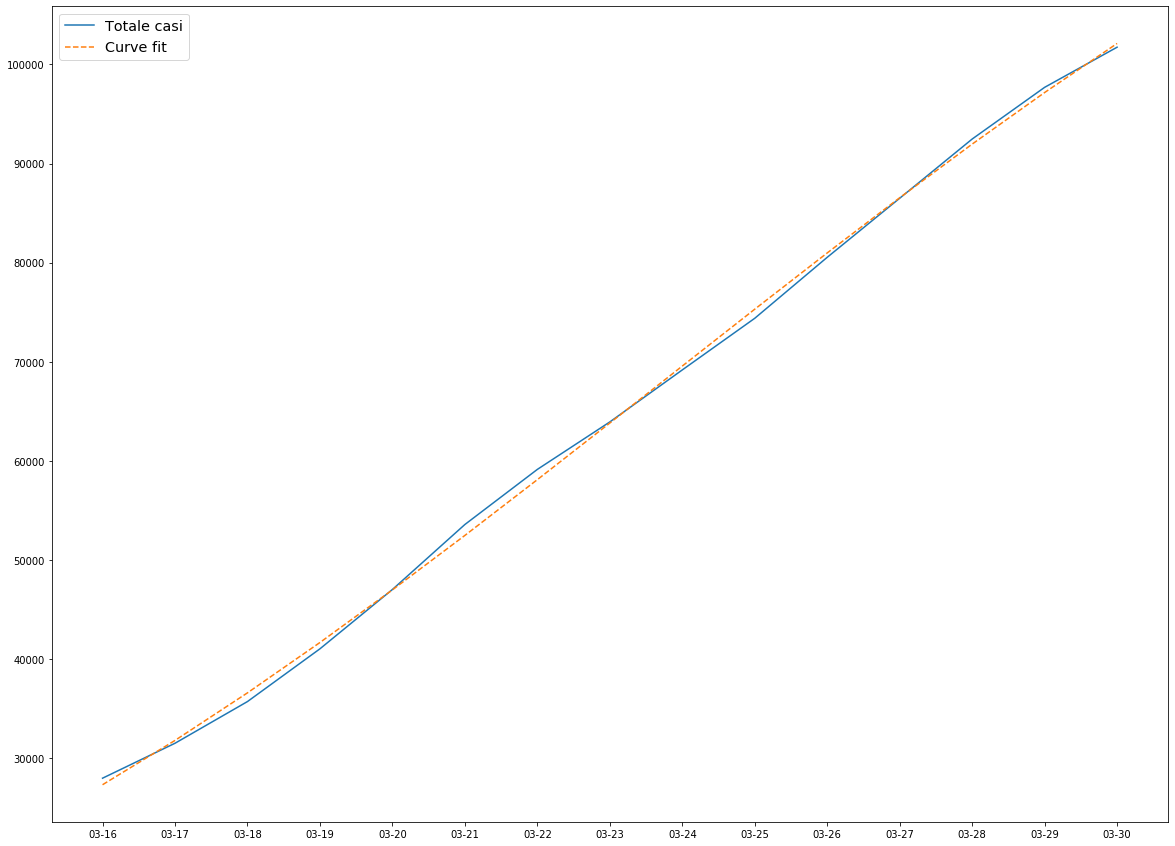

In [40]:
xdata, popt_cub, pcov_cub = fit_data(totale_casi, data, cubic_func)

## Errore parametri - ENG: Parameters Error

In [41]:
np.sqrt(np.diag(pcov_cub)).sum()

1050.7864557819435

## Predizione giorno seguente - ENG: Next Day Prediction

In [42]:
cubic_pred = cubic_func(np.array([xdata[-1]+1]), *popt_cub).astype(int)

In [43]:
print("Valore odierno: {0} | Giorno seguente: {1} | Incremento {2}".format(totale_casi[-1], cubic_pred[0],
                                                                           cubic_pred[0] - totale_casi[-1]))

Valore odierno: 101739 | Giorno seguente: 106763 | Incremento 5024


# Quadratic curve fit per Casi Totali - ENG: Quadratic curve fit for Total Cases

In [44]:
def quadratic_func(x, a, b, c):
    return a*np.power(x, 2) + b*x + c

Parameters: [1.83912500e+01 5.21132964e+03 2.64360179e+04]


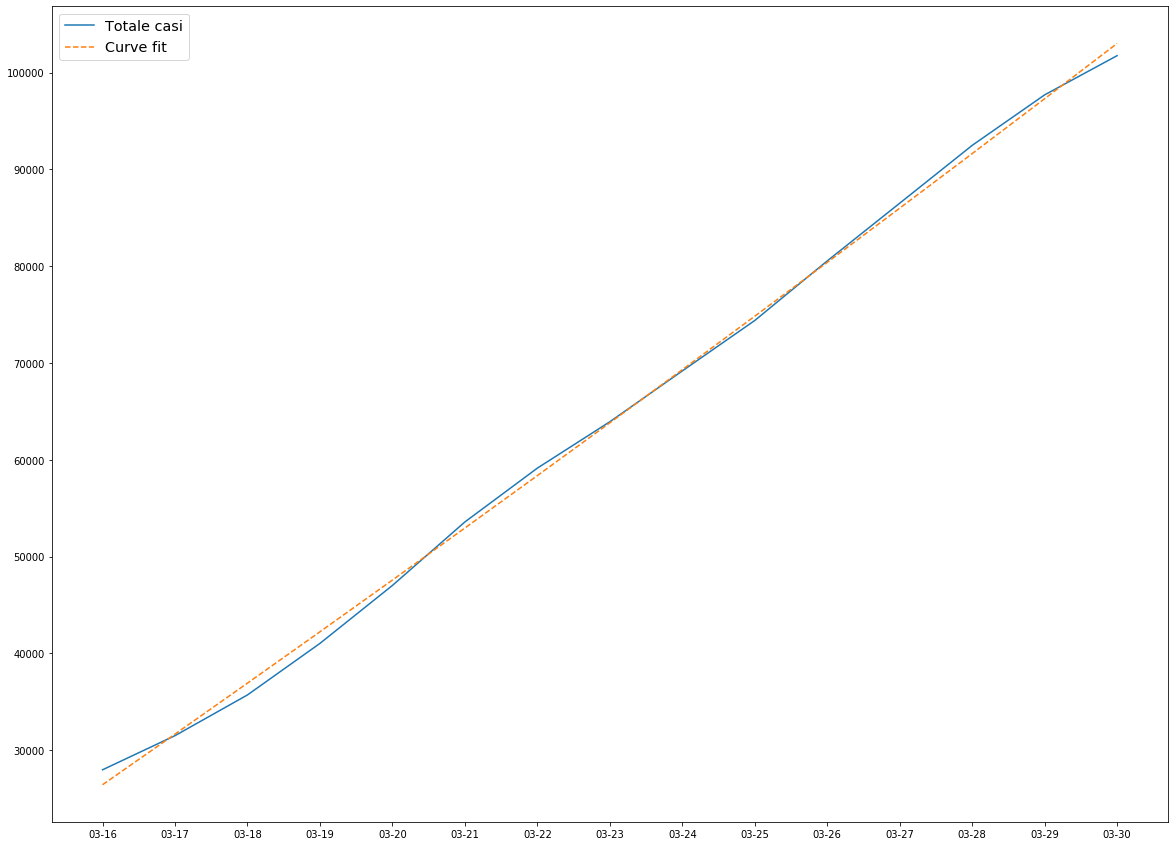

In [45]:
xdata, popt_sqr, pcov_sqr = fit_data(totale_casi, data, quadratic_func)

## Errore parametri - ENG: Parameters Error

In [46]:
np.sqrt(np.diag(pcov_sqr)).sum()

826.3304669605691

## Predizione giorno seguente - ENG: Next Day Prediction

In [47]:
quadratic_pred = quadratic_func(np.array([xdata[-1]+1]), *popt_sqr).astype(int)

In [48]:
print("Valore odierno: {0} | Giorno seguente: {1} | Incremento {2}".format(totale_casi[-1], quadratic_pred[0],
                                                                           quadratic_pred[0] - totale_casi[-1]))

Valore odierno: 101739 | Giorno seguente: 108743 | Incremento 7004


# Linear fit per Casi Totali - ENG: Linear fit for Total Cases

In [49]:
def linear_func(x, a, b):
    return a*x + b

Parameters: [ 5468.80714478 25878.14998425]


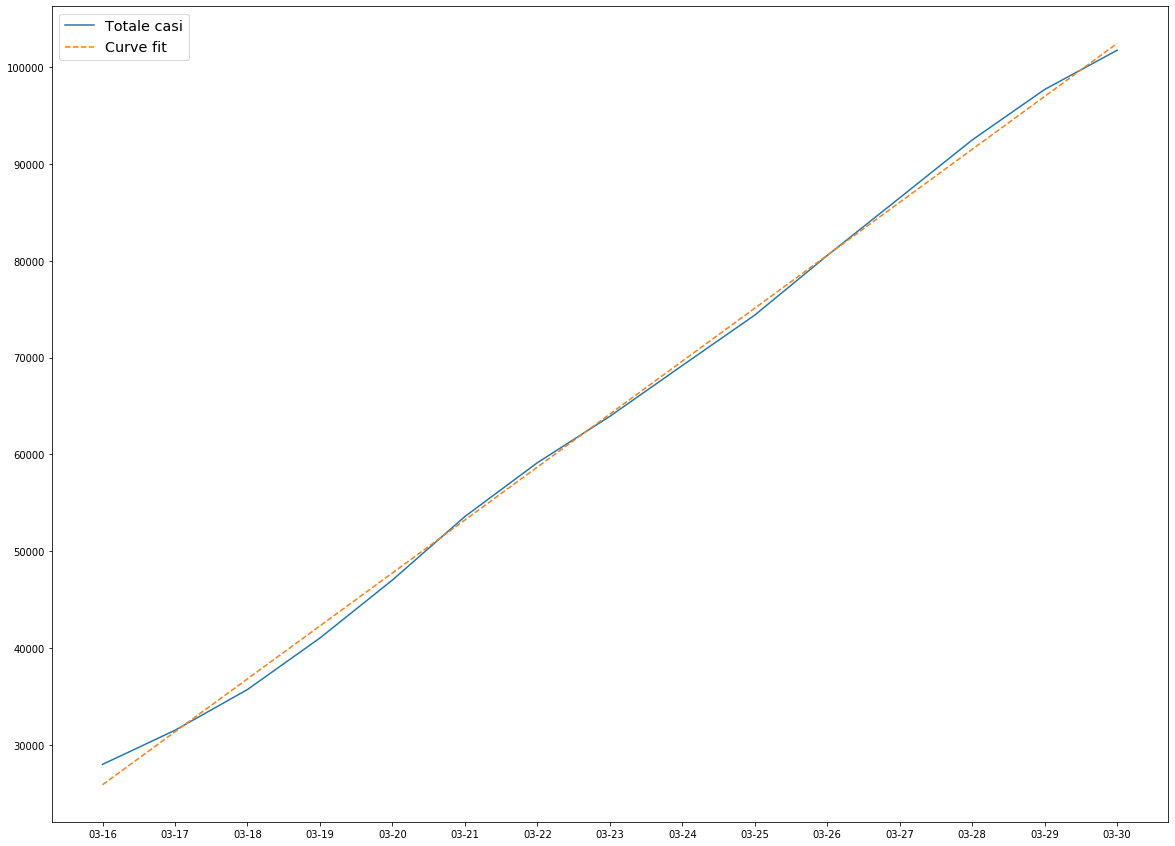

In [50]:
xdata, popt_lin, pcov_lin = fit_data(totale_casi, data, linear_func)

## Errore parametri - ENG: Parameters Error

In [51]:
np.sqrt(np.diag(pcov_lin)).sum()

507.3496396685782

## Predizione giorno seguente - ENG: Next Day Prediction

In [52]:
lin_pred = linear_func(np.array([xdata[-1]+1]), *popt_lin).astype(int)

In [53]:
print("Valore odierno: {0} | Giorno seguente: {1} | Incremento {2}".format(totale_casi[-1], lin_pred[0],
                                                                           lin_pred[0] - totale_casi[-1]))

Valore odierno: 101739 | Giorno seguente: 107910 | Incremento 6171


# Combinazione modelli - ENG: Model Ensemble

## Modello Quadratico + Cubico - ENG: Quadratic + Cubic Model

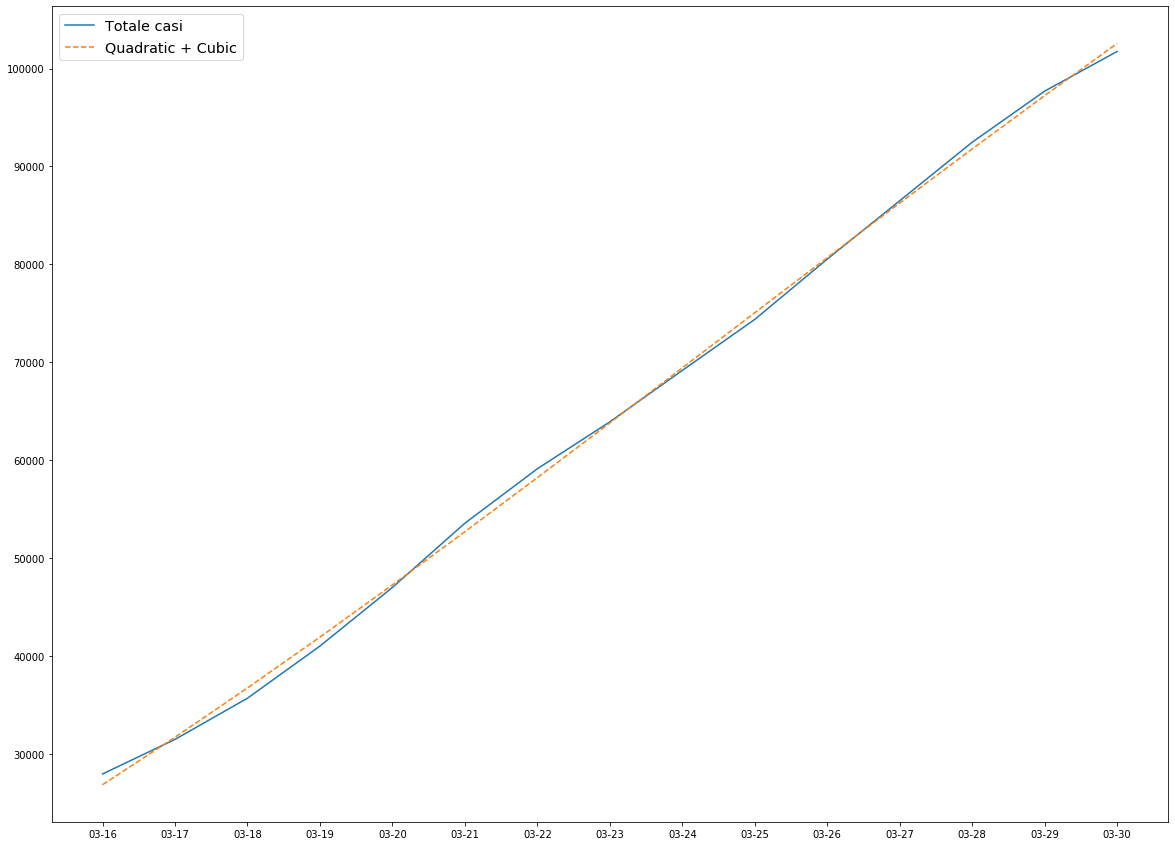

In [54]:
ensemble = (quadratic_func(xdata, *popt_sqr) + cubic_func(xdata, *popt_cub))/2

plt.rcParams.update({"legend.fontsize": "x-large",
                 "figure.figsize": (20, 15),
                 'xtick.labelsize': 10})
ax = plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)

plt.plot(data, totale_casi, label="Totale casi")
plt.plot(data, ensemble, "--", label="Quadratic + Cubic")

plt.legend(loc="upper left")
plt.show()

## Predizione giorno seguente - ENG: Next Day Prediction

In [55]:
ensemble_pred = int((quadratic_pred + cubic_pred)/2)

In [56]:
print("Valore odierno: {0} | Giorno seguente: {1} | Incremento {2}".format(totale_casi[-1], ensemble_pred,
                                                                           ensemble_pred - totale_casi[-1]))

Valore odierno: 101739 | Giorno seguente: 107753 | Incremento 6014


## Predizione a 7 giorni - ENG: 7 days prediction

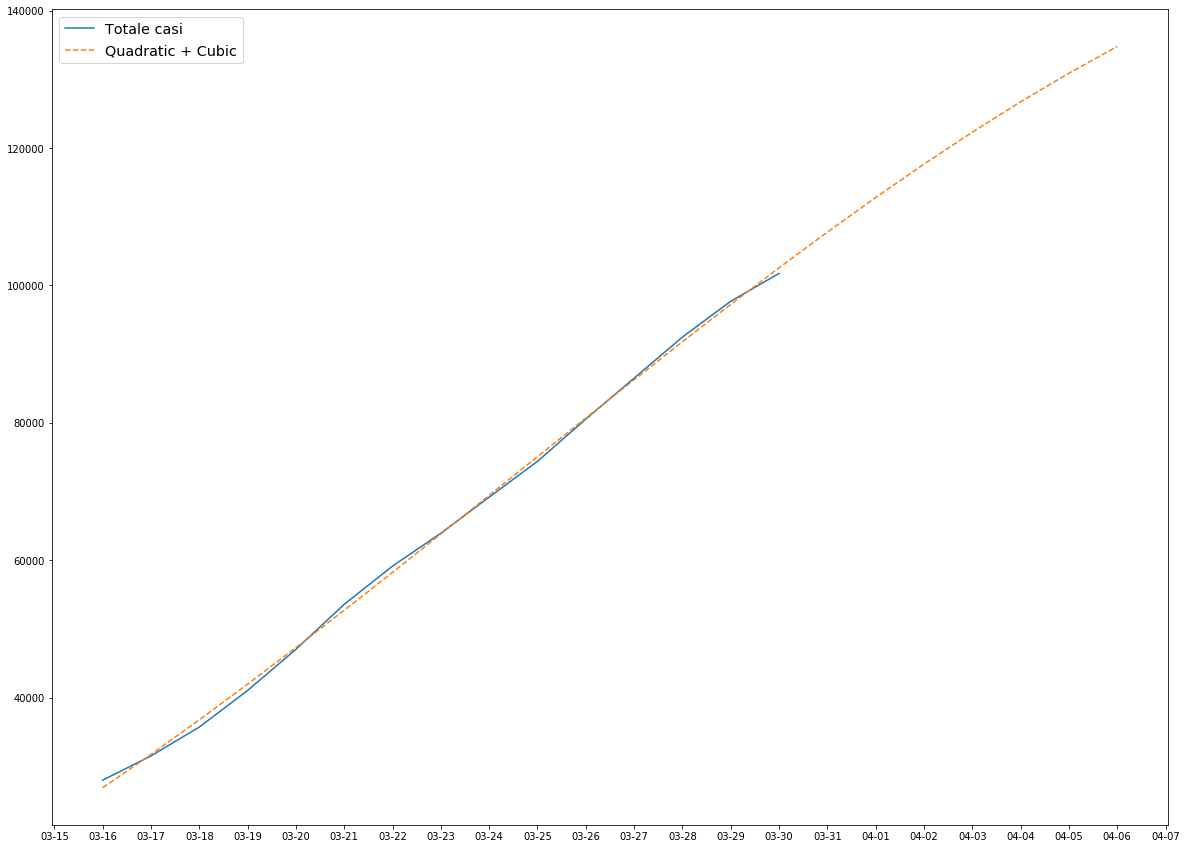

In [57]:
x = np.arange(xdata[0], len(xdata)+7, 1)
quadratic_pred = quadratic_func(x, *popt_sqr).astype(int)
cubic_pred = cubic_func(x, *popt_cub).astype(int)
ensemble_pred = (quadratic_pred + cubic_pred) / 2

plt.rcParams.update({"legend.fontsize": "x-large",
                 "figure.figsize": (20, 15),
                 'xtick.labelsize': 10})
ax = plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)

plt.plot(data, totale_casi, label="Totale casi")
data_range = np.arange(data[0], data[-1] + np.timedelta64("8", "D"), np.timedelta64("1", "D"))
plt.plot(data_range, ensemble_pred, "--", label="Quadratic + Cubic")

plt.legend(loc="upper left")
plt.show()